# Explainable AI (XAI) - SHAPASH

Shapash is a Python library which aims to make machine learning interpretable and understandable to everyone. Shapash provides several types of visualization which displays explicit labels that everyone can understand.

Data Scientists can more easily understand their models and share their results. End users can understand the decision proposed by a model using a summary of the most influential criteria. 


- GitHub : https://github.com/MAIF/shapash

- Documentation : https://shapash.readthedocs.io/

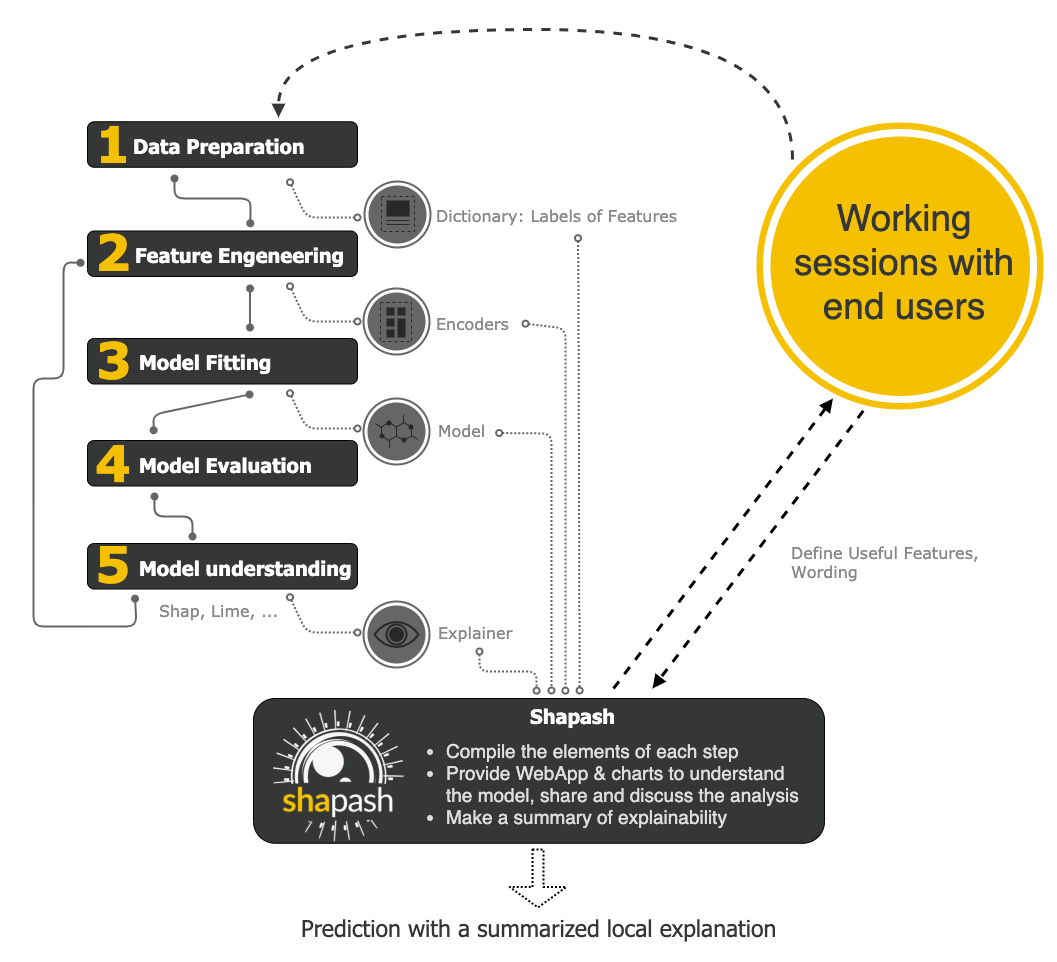

# Importing Libraries

In [ ]:
#Data Manipulation
import numpy as np 
import pandas as pd 

# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
import matplotlib.lines as mlines

import warnings
warnings.filterwarnings("ignore")

# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline


# Loading Dataset

In [ ]:
# Uploading saved dataframe csv file from google drive
! gdown --id 1cfNXnd6oMsqb0gH-yn54Rtaf7VgCsDSX

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1cfNXnd6oMsqb0gH-yn54Rtaf7VgCsDSX
To: /content/df_1.csv
100% 788M/788M [00:02<00:00, 294MB/s]


In [ ]:
%%time
# Load Data
df   = pd.read_csv('/content/df_1.csv')

CPU times: user 22.4 s, sys: 6.14 s, total: 28.5 s
Wall time: 28.6 s


In [ ]:
df.head()

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card2_missing_flag,card3_missing_flag,card4_missing_flag,card5_missing_flag,card6_missing_flag,addr1_missing_flag,addr2_missing_flag,dist1_missing_flag,dist2_missing_flag,P_emaildomain_missing_flag,R_emaildomain_missing_flag,D1_missing_flag,D2_missing_flag,D3_missing_flag,D4_missing_flag,D5_missing_flag,D6_missing_flag,D7_missing_flag,D8_missing_flag,D9_missing_flag,D10_missing_flag,D11_missing_flag,D12_missing_flag,D13_missing_flag,D14_missing_flag,D15_missing_flag,M1_missing_flag,M2_missing_flag,M3_missing_flag,M4_missing_flag,M5_missing_flag,M6_missing_flag,M7_missing_flag,M8_missing_flag,M9_missing_flag,V1_missing_flag,V2_missing_flag,V3_missing_flag,V4_missing_flag,V5_missing_flag,V6_missing_flag,V7_missing_flag,V8_missing_flag,V9_missing_flag,V10_missing_flag,V11_missing_flag,V12_missing_flag,V13_missing_flag,V14_missing_flag,V15_missing_flag,V16_missing_flag,V17_missing_flag,V18_missing_flag,V19_missing_flag,V20_missing_flag,V21_missing_flag,V22_missing_flag,V23_missing_flag,V24_missing_flag,V25_missing_flag,V26_missing_flag,V27_missing_flag,V28_missing_flag,V29_missing_flag,V30_missing_flag,V31_missing_flag,V32_missing_flag,V33_missing_flag,V34_missing_flag,V35_missing_flag,V36_missing_flag,V37_missing_flag,V38_missing_flag,V39_missing_flag,V40_missing_flag,V41_missing_flag,V42_missing_flag,V43_missing_flag,V44_missing_flag,V45_missing_flag,V46_missing_flag,V47_missing_flag,V48_missing_flag,V49_missing_flag,V50_missing_flag,V51_missing_flag,V52_missing_flag,V53_missing_flag,V54_missing_flag,V55_missing_flag,V56_missing_flag,V57_missing_flag,V58_missing_flag,V59_missing_flag,V60_missing_flag,V61_missing_flag,V62_missing_flag,V63_missing_flag,V64_missing_flag,V65_missing_flag,V66_missing_flag,V67_missing_flag,V68_missing_flag,V69_missing_flag,V70_missing_flag,V71_missing_flag,V72_missing_flag,V73_missing_flag,V74_missing_flag,V75_missing_flag,V76_missing_flag,V77_missing_flag,V78_missing_flag,V79_missing_flag,V80_missing_flag,V81_missing_flag,V82_missing_flag,V83_missing_flag,V84_missing_flag,V85_missing_flag,V86_missing_flag,V87_missing_flag,V88_missing_flag,V89_missing_flag,V90_missing_flag,V91_missing_flag,V92_missing_flag,V93_missing_flag,V94_missing_flag,V95_missing_flag,V96_missing_flag,V97_missing_flag,V98_missing_flag,V99_missing_flag,V100_missing_flag,V101_missing_flag,V102_missing_flag,V103_missing_flag,V104_missing_flag,V105_missing_flag,V106_missing_flag,V107_missing_flag,V108_missing_flag,V109_missing_flag,V110_missing_flag,V111_missing_flag,V112_missing_flag,V113_missing_flag,V114_missing_flag,V115_missing_flag,V116_missing_flag,V117_missing_flag,V118_missing_flag,V119_missing_flag,V120_missing_flag,V121_missing_flag,V122_missing_flag,V123_missing_flag,V124_missing_flag,V125_missing_flag,V126_missing_flag,V127_missing_flag,V128_missing_flag,V129_missing_flag,V130_missing_flag,V131_missing_flag,V132_missing_flag,V133_missing_flag,V134_missing_flag,...,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_missing_flag,V

In [ ]:
df.shape

(590540, 534)

# Model Building

In [ ]:
# Split the y variable series and X variables dataset
X = df.drop(['isFraud'],axis=1)
y = df.isFraud.astype(bool)

In [ ]:
# Split the dataset into the training set and test set
from   sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(413378, 533) (413378,)
(177162, 533) (177162,)


In [ ]:
# Head of X_train
X_train.head()

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card2_missing_flag,card3_missing_flag,card4_missing_flag,card5_missing_flag,card6_missing_flag,addr1_missing_flag,addr2_missing_flag,dist1_missing_flag,dist2_missing_flag,P_emaildomain_missing_flag,R_emaildomain_missing_flag,D1_missing_flag,D2_missing_flag,D3_missing_flag,D4_missing_flag,D5_missing_flag,D6_missing_flag,D7_missing_flag,D8_missing_flag,D9_missing_flag,D10_missing_flag,D11_missing_flag,D12_missing_flag,D13_missing_flag,D14_missing_flag,D15_missing_flag,M1_missing_flag,M2_missing_flag,M3_missing_flag,M4_missing_flag,M5_missing_flag,M6_missing_flag,M7_missing_flag,M8_missing_flag,M9_missing_flag,V1_missing_flag,V2_missing_flag,V3_missing_flag,V4_missing_flag,V5_missing_flag,V6_missing_flag,V7_missing_flag,V8_missing_flag,V9_missing_flag,V10_missing_flag,V11_missing_flag,V12_missing_flag,V13_missing_flag,V14_missing_flag,V15_missing_flag,V16_missing_flag,V17_missing_flag,V18_missing_flag,V19_missing_flag,V20_missing_flag,V21_missing_flag,V22_missing_flag,V23_missing_flag,V24_missing_flag,V25_missing_flag,V26_missing_flag,V27_missing_flag,V28_missing_flag,V29_missing_flag,V30_missing_flag,V31_missing_flag,V32_missing_flag,V33_missing_flag,V34_missing_flag,V35_missing_flag,V36_missing_flag,V37_missing_flag,V38_missing_flag,V39_missing_flag,V40_missing_flag,V41_missing_flag,V42_missing_flag,V43_missing_flag,V44_missing_flag,V45_missing_flag,V46_missing_flag,V47_missing_flag,V48_missing_flag,V49_missing_flag,V50_missing_flag,V51_missing_flag,V52_missing_flag,V53_missing_flag,V54_missing_flag,V55_missing_flag,V56_missing_flag,V57_missing_flag,V58_missing_flag,V59_missing_flag,V60_missing_flag,V61_missing_flag,V62_missing_flag,V63_missing_flag,V64_missing_flag,V65_missing_flag,V66_missing_flag,V67_missing_flag,V68_missing_flag,V69_missing_flag,V70_missing_flag,V71_missing_flag,V72_missing_flag,V73_missing_flag,V74_missing_flag,V75_missing_flag,V76_missing_flag,V77_missing_flag,V78_missing_flag,V79_missing_flag,V80_missing_flag,V81_missing_flag,V82_missing_flag,V83_missing_flag,V84_missing_flag,V85_missing_flag,V86_missing_flag,V87_missing_flag,V88_missing_flag,V89_missing_flag,V90_missing_flag,V91_missing_flag,V92_missing_flag,V93_missing_flag,V94_missing_flag,V95_missing_flag,V96_missing_flag,V97_missing_flag,V98_missing_flag,V99_missing_flag,V100_missing_flag,V101_missing_flag,V102_missing_flag,V103_missing_flag,V104_missing_flag,V105_missing_flag,V106_missing_flag,V107_missing_flag,V108_missing_flag,V109_missing_flag,V110_missing_flag,V111_missing_flag,V112_missing_flag,V113_missing_flag,V114_missing_flag,V115_missing_flag,V116_missing_flag,V117_missing_flag,V118_missing_flag,V119_missing_flag,V120_missing_flag,V121_missing_flag,V122_missing_flag,V123_missing_flag,V124_missing_flag,V125_missing_flag,V126_missing_flag,V127_missing_flag,V128_missing_flag,V129_missing_flag,V130_missing_flag,V131_missing_flag,V132_missing_flag,V133_missing_flag,V134_missing_flag,V135_missing_flag,...,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_miss

Handling Missing Values - Imputation

In [ ]:
from sklearn.impute import KNNImputer, SimpleImputer

# replace inf
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Impute
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer = KNNImputer(n_neighbors=3)

X_train_imputed = imputer.fit_transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_train_imputed.head()

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card2_missing_flag,card3_missing_flag,card4_missing_flag,card5_missing_flag,card6_missing_flag,addr1_missing_flag,addr2_missing_flag,dist1_missing_flag,dist2_missing_flag,P_emaildomain_missing_flag,R_emaildomain_missing_flag,D1_missing_flag,D2_missing_flag,D3_missing_flag,D4_missing_flag,D5_missing_flag,D6_missing_flag,D7_missing_flag,D8_missing_flag,D9_missing_flag,D10_missing_flag,D11_missing_flag,D12_missing_flag,D13_missing_flag,D14_missing_flag,D15_missing_flag,M1_missing_flag,M2_missing_flag,M3_missing_flag,M4_missing_flag,M5_missing_flag,M6_missing_flag,M7_missing_flag,M8_missing_flag,M9_missing_flag,V1_missing_flag,V2_missing_flag,V3_missing_flag,V4_missing_flag,V5_missing_flag,V6_missing_flag,V7_missing_flag,V8_missing_flag,V9_missing_flag,V10_missing_flag,V11_missing_flag,V12_missing_flag,V13_missing_flag,V14_missing_flag,V15_missing_flag,V16_missing_flag,V17_missing_flag,V18_missing_flag,V19_missing_flag,V20_missing_flag,V21_missing_flag,V22_missing_flag,V23_missing_flag,V24_missing_flag,V25_missing_flag,V26_missing_flag,V27_missing_flag,V28_missing_flag,V29_missing_flag,V30_missing_flag,V31_missing_flag,V32_missing_flag,V33_missing_flag,V34_missing_flag,V35_missing_flag,V36_missing_flag,V37_missing_flag,V38_missing_flag,V39_missing_flag,V40_missing_flag,V41_missing_flag,V42_missing_flag,V43_missing_flag,V44_missing_flag,V45_missing_flag,V46_missing_flag,V47_missing_flag,V48_missing_flag,V49_missing_flag,V50_missing_flag,V51_missing_flag,V52_missing_flag,V53_missing_flag,V54_missing_flag,V55_missing_flag,V56_missing_flag,V57_missing_flag,V58_missing_flag,V59_missing_flag,V60_missing_flag,V61_missing_flag,V62_missing_flag,V63_missing_flag,V64_missing_flag,V65_missing_flag,V66_missing_flag,V67_missing_flag,V68_missing_flag,V69_missing_flag,V70_missing_flag,V71_missing_flag,V72_missing_flag,V73_missing_flag,V74_missing_flag,V75_missing_flag,V76_missing_flag,V77_missing_flag,V78_missing_flag,V79_missing_flag,V80_missing_flag,V81_missing_flag,V82_missing_flag,V83_missing_flag,V84_missing_flag,V85_missing_flag,V86_missing_flag,V87_missing_flag,V88_missing_flag,V89_missing_flag,V90_missing_flag,V91_missing_flag,V92_missing_flag,V93_missing_flag,V94_missing_flag,V95_missing_flag,V96_missing_flag,V97_missing_flag,V98_missing_flag,V99_missing_flag,V100_missing_flag,V101_missing_flag,V102_missing_flag,V103_missing_flag,V104_missing_flag,V105_missing_flag,V106_missing_flag,V107_missing_flag,V108_missing_flag,V109_missing_flag,V110_missing_flag,V111_missing_flag,V112_missing_flag,V113_missing_flag,V114_missing_flag,V115_missing_flag,V116_missing_flag,V117_missing_flag,V118_missing_flag,V119_missing_flag,V120_missing_flag,V121_missing_flag,V122_missing_flag,V123_missing_flag,V124_missing_flag,V125_missing_flag,V126_missing_flag,V127_missing_flag,V128_missing_flag,V129_missing_flag,V130_missing_flag,V131_missing_flag,V132_missing_flag,V133_missing_flag,V134_missing_flag,V135_missing_flag,...,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_miss

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics  import classification_report 
from sklearn.metrics  import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics  import roc_auc_score 
from sklearn.metrics  import plot_roc_curve 
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics  import plot_precision_recall_curve

In [ ]:
def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):

    print('\n')
    print("\n Accuracy Score : ",accuracy_score(y_actual,y_predicted))
    print('\n')
    print("\n AUC - ROC Score : ", roc_auc_score(y_actual, y_predicted_prob))
    print('\n')
    print("\n Classification Report : \n\n",classification_report(y_actual, y_predicted))
    print('\n')
    print("\n Confusion Matrix : \n\n",confusion_matrix(y_actual, y_predicted))
    print('\n')
    print('\n Confusion Matrix Plot: \n')
    plot_confusion_matrix(model, x_test, y_actual, cmap='plasma', values_format='d')
    plt.show()

    print("\n AUC - ROC Curve:  \n")
   
    plot_roc_curve(model, x_test, y_actual)
    plt.show() 

    print("\n Precision - Recall Curve:  \n")
    plot_precision_recall_curve(model, x_test, y_actual)
    plt.show() 

## Model Fitting

In [ ]:
%%time
# Define the model
from lightgbm import LGBMClassifier
lgbc = LGBMClassifier(random_state=42, max_depth=20, n_estimator=100, num_leaves=256)

# Train the model
lgbc.fit(X_train_imputed,y_train)

lgbc

CPU times: user 5min 41s, sys: 815 ms, total: 5min 41s
Wall time: 1min 30s


LGBMClassifier(max_depth=20, n_estimator=100, num_leaves=256, random_state=42)

In [ ]:
# Impute X_Test before predicting
X_test_imputed = imputer.transform(X_test)

# Prediction
y_pred_lgbc = lgbc.predict(X_test_imputed)
y_prob_pred_lgbc = lgbc.predict_proba(X_test_imputed)
y_prob_pred_lgbc = [x[1] for x in y_prob_pred_lgbc]
print("Y predicted : ",y_pred_lgbc)
print("Y probability predicted : ",y_prob_pred_lgbc[:5])

Y predicted :  [False False False ... False False False]
Y probability predicted :  [0.004178265453865326, 0.003889994601454283, 0.003588747499682396, 0.05139667781750812, 0.0007428310332015758]


## Model Evaluation




 Accuracy Score :  0.9827050947720166



 AUC - ROC Score :  0.9594066674454199



 Classification Report : 

               precision    recall  f1-score   support

       False       0.98      1.00      0.99    170821
        True       0.93      0.56      0.70      6341

    accuracy                           0.98    177162
   macro avg       0.96      0.78      0.84    177162
weighted avg       0.98      0.98      0.98    177162




 Confusion Matrix : 

 [[170562    259]
 [  2805   3536]]



 Confusion Matrix Plot: 



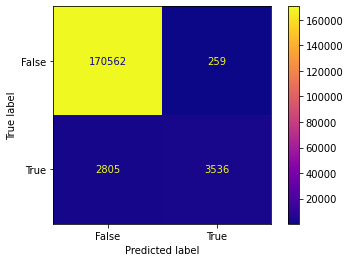


 AUC - ROC Curve:  



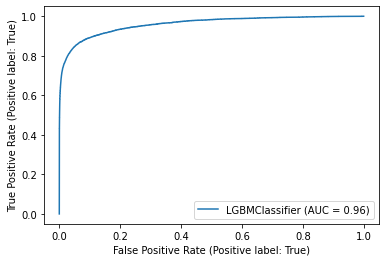


 Precision - Recall Curve:  



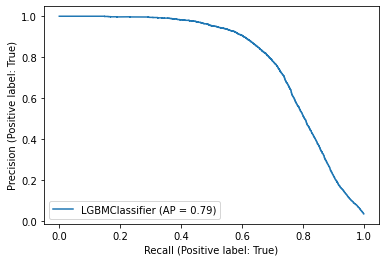

In [ ]:
# Compute Evaluation Metric
compute_evaluation_metric(lgbc, X_test_imputed, y_test, y_pred_lgbc, y_prob_pred_lgbc)

## Feature Selection

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [ ]:
lgbc.feature_importances_

array([ 367,   71, 1328,  978,  126,  114,  393,  144,  920,   19,  354,
        433,  174,  286,  284,   27,   26,  103,  238,   19,   98,  176,
         75,  233,   66,  421,  204,  349,  282,  173,  290,  119,   49,
        221,  101,  321,  185,   48,   56,   73,  385,    1,   47,   46,
        145,  127,  140,   42,   29,   41,  133,  345,   35,   20,  134,
        112,   42,   12,   23,    7,  151,   91,   21,   14,   44,  260,
        305,    9,    2,   39,   86,   10,  129,   17,    3,    6,   19,
         51,   27,  252,   34,    0,    0,   17,    0,    2,    0,   19,
         33,   12,    1,    1,   14,   15,    1,   12,    5,    3,    0,
          0,    0,    0,    0,    9,    5,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
feature_importance_df = pd.DataFrame({'feature' : X_train_imputed.columns, 'importance' : lgbc.feature_importances_ })

In [ ]:
feature_importance_df = feature_importance_df.head(15).sort_values(by="importance", ascending=False)
feature_importance_df = feature_importance_df.iloc[:30,:]
feature_importance_df

,feature,importance
2,card1,1328
3,card2,978
8,addr1,920
11,P_emaildomain,433
6,card5,393
0,TransactionAmt,367
10,dist1,354
13,C1,286
14,C2,284
12,R_emaildomain,174


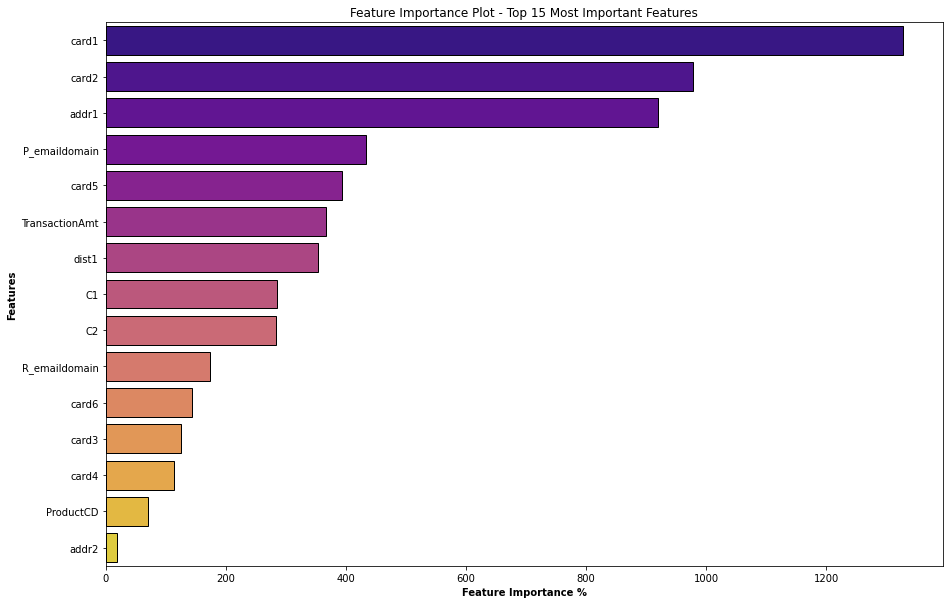

In [ ]:
plt.figure(figsize=(15, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df.head(15).sort_values(by="importance", ascending=False),
            palette= 'plasma',edgecolor = 'black',linewidth = 1);
plt.title('Feature Importance Plot - Top 15 Most Important Features')
plt.xlabel('Feature Importance %',weight='bold')
plt.ylabel('Features',weight='bold');

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- card1 is contributing the most in predicting if a financial transaction is fraud or legitimate
- card2, addr1, P_emaildomain, etc are some of the most important features in predicting the fraud
- Certain card types, addresses and emails are at high risk of fraud, so there is a need to monitor these carefully

# SHAPASH

## SHAPASH Installation

In [ ]:
!pip install shapash

## Model Fitting

In [ ]:
%%time
# Define the model
from lightgbm import LGBMClassifier
lgbc = LGBMClassifier(random_state=42, max_depth=20, n_estimator=100, num_leaves=256)

# Train the model
lgbc.fit(X_train,y_train)

lgbc

CPU times: user 6min 14s, sys: 1.23 s, total: 6min 15s
Wall time: 1min 44s


LGBMClassifier(max_depth=20, n_estimator=100, num_leaves=256, random_state=42)

## Encoding Categorical Features

In [ ]:
y_pred = pd.DataFrame(lgbc.predict(X_test),columns=['pred'],index = X_test.index)
y_pred.head()

,pred
470624,False
565820,False
284083,False
239689,False
281855,False


In [ ]:
y_pred['pred'] = y_pred['pred'].replace({True: 1, False: 0})

## Declare and Compile SmartExplainer

In [ ]:
from shapash.explainer.smart_explainer import SmartExplainer 

In [ ]:
xpl = SmartExplainer(lgbc)

In [ ]:
%%time
xpl.compile(x=X_test,y_pred=y_pred)

CPU times: user 2h 5min 23s, sys: 3.09 s, total: 2h 5min 26s
Wall time: 32min


## SHAPASH -  Features Importance Plot

- The methode features_importance displays a bar chart representing the sum of absolute contribution values of each feature.

- This method also makes it possible to represent this sum calculated on a subset and to compare it with the total population

In [ ]:
xpl.plot.features_importance()

## SHAPASH -  Contibution Plot

Contribution Plot  displays violin or scatter plot. The purpose of these representations is to understand how a feature affects a prediction.

### Feature - C5

In [ ]:
xpl.plot.contribution_plot('C5')

### Feature - C13

In [ ]:
xpl.plot.contribution_plot('C13')

### Feature - Card1

In [ ]:
xpl.plot.contribution_plot('card1')

### Feature - Card2

In [ ]:
xpl.plot.contribution_plot('card2')

### Feature - Card4

In [ ]:
xpl.plot.contribution_plot('card4')

### Feature - Card5

In [ ]:
xpl.plot.contribution_plot('card5')

### Feature - Card6

In [ ]:
xpl.plot.contribution_plot('card6')

### Feature - TransactionAmt

In [ ]:
xpl.plot.contribution_plot('TransactionAmt')

### Feature - P_emaildomain

In [ ]:
xpl.plot.contribution_plot('P_emaildomain')

### Feature - addr1

In [ ]:
xpl.plot.contribution_plot('addr1')

## SHAPASH - Local Plot

Use row_num, index or query parameter to specify which row prediction you want to explain

In [ ]:
#Local Plot for row/observation 27
xpl.plot.local_plot(row_num = 27)

**Inferences:**

1. Plot shows the proba score as 0.02 for row 27 and Id: 3942 which indicates the probability of transaction being fraud is 2%
2. On the right, we have postive contribution features in yellow color and these features contribute more in making a financial transaction as fraud i.e flagged as 1
3. On the left, we have negative contribution features in blue color and these features contribute less in making a financial transaction as fraud i.e flagged as 0

In [ ]:
#Local Plot for row/observation 48
xpl.plot.local_plot(row_num = 48)

**Inferences:**

1. Plot shows the proba score as 0.0018 for row 48 and Id: 578709 which indicates the probability of transaction being fraud is 0.1%
2. On the right, we have postive contribution features in yellow color and these features contribute more in making a financial transaction as fraud i.e flagged as 1
3. On the left, we have negative contribution features in blue color and these features contribute less in making a financial transaction as fraud i.e flagged as 0

In [ ]:
#Local Plot for row/observation 64
xpl.plot.local_plot(row_num = 64)

**Inferences:**

1. Plot shows the proba score as 0.7439 for row 64 and Id: 194418 which indicates the probability of transaction being fraud is 74.39%
2. On the right, we have postive contribution features in yellow color and these features contribute more in making a financial transaction as fraud i.e flagged as 1
3. On the left, we have negative contribution features in blue color and these features contribute less in making a financial transaction as fraud i.e flagged as 0

In [ ]:
#Local Plot for row/observation 79
xpl.plot.local_plot(row_num = 79)

**Inferences:**

1. Plot shows the proba score as 0.0205 for row 79 and Id: 133438 which indicates the probability of transaction being fraud is 2%
2. On the right, we have postive contribution features in yellow color and these features contribute more in making a financial transaction as fraud i.e flagged as 1
3. On the left, we have negative contribution features in blue color and these features contribute less in making a financial transaction as fraud i.e flagged as 0

## Start SHAPASH WebApp

In [ ]:
%%time
app = xpl.run_app(title_story='Financial Transaction Fraud Detection')

CPU times: user 5min 6s, sys: 2.44 s, total: 5min 9sDash is running on http://0.0.0.0:8050/


Wall time: 5min 8s


INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8050/



## Save Explainer in Pickle File

In [ ]:
#save the SmartExplainer Object in a pickle file to make new plots later or launch the WebApp again
predictor = xpl.to_smartpredictor()
predictor.save('./predictor.pkl')

## Stop SHAPASH WebApp

In [ ]:
app.kill()